# Introduction

## Business Problem :
A Telecom industry want to segment their customers to provide better services and offers according to user behaviour 

### Approach :
we will solve this problem of segmenting customers through unsupervised technique called clustering

#### Cluster Analysis:
Cluster Analysis is the most prominent and widely used unsupervised machine learning Technique.The main theme of this technique is to group all the data that having similarities 
in the data .

#### Application of Cluster Analysis :
Grouping of data helps us to find out the hidden patterns in the data and gives us more insights about the data.it differeniates the data into different segments on the basis of homogenity.For example we can differentiate the segment of customers in a telecome industry and also we can differentiate the students in a class into different segments depending upon their grades .Here we will try to understand cluster analysis by an example 


#### Types of Cluster Analysis :
Although there are many type of cluster algorithms techniques, let's only discuss the two most important and widely used techniques

1) Hierarchical Clustering

2) K-mean Clustering

# Hierarchical Clustering :

Hierarchical Clustering starts at point taking each observation as a cluster and combines two nearest observations as one cluster

1) Assign each data point to its cluster.

2) Find closest pair of cluster using euclidean distance and merge them in to single cluster.

3) Calculate distance between two nearest clusters and combine until all items are clustered in to a single cluster.

In [1]:
#importing the necessary packages

import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
os.chdir("C:\\Users\\Dell\\Desktop")
telco = pd.read_csv("Telco.csv")

In [5]:
telco.shape

(1000, 5)

In [8]:
telco.head()

,Calls,Intern,Text,Data,Age
0,1.12,0.19,23.92,0.18,60
1,1.08,0.22,17.76,0.23,54
2,3.54,0.26,289.79,1.99,34
3,1.09,0.21,19.15,0.21,61
4,1.04,0.24,20.33,0.20,56


In [9]:
# scaling the data
telco_scaled = telco.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [10]:
telco_scaled.head()

,Calls,Intern,Text,Data,Age
0,-0.996125,-0.569290,-0.940982,-1.299162,1.372936
1,-1.022513,-0.489795,-0.969806,-1.262765,1.002273
2,0.600387,-0.383802,0.303060,0.018380,-0.233271
3,-1.015916,-0.516293,-0.963302,-1.277324,1.434713
4,-1.048902,-0.436798,-0.957780,-1.284603,1.125827


In [11]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

reference  https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

In [12]:
Z = linkage(telco_scaled, 'complete')

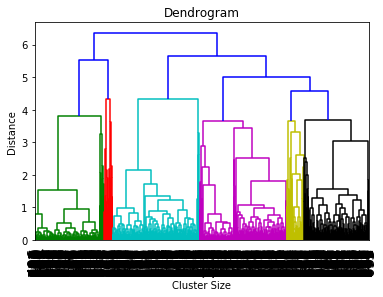

In [13]:
dendrogram(Z,leaf_rotation=90, leaf_font_size=15.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

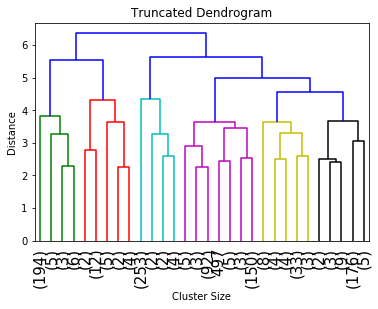

In [14]:
dendrogram(Z,truncate_mode='lastp',p=30,leaf_rotation=90, leaf_font_size=15.)
plt.title("Truncated Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

## Agglomerative Hierarchical Clustering

In [15]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [16]:
hclust = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

In [17]:
hclust.fit(telco_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=5)

In [18]:
telco['Groups'] = hclust.labels_

In [19]:
telco.head(10)

,Calls,Intern,Text,Data,Age,Groups
0,1.12,0.19,23.92,0.18,60,3
1,1.08,0.22,17.76,0.23,54,3
2,3.54,0.26,289.79,1.99,34,4
3,1.09,0.21,19.15,0.21,61,3
4,1.04,0.24,20.33,0.20,56,3
5,5.59,0.88,19.23,2.02,41,0
6,1.19,0.19,17.94,0.24,71,3
7,3.07,0.34,359.49,2.06,30,4
8,5.34,0.99,295.47,0.97,41,0
9,2.43,0.09,17.57,0.46,33,4


In [20]:
telco.groupby(['Groups']).mean()

,Calls,Intern,Text,Data,Age
Groups,,,,,
0,4.472227,1.010486,82.832146,2.009190,43.149798
1,4.700400,0.432400,376.350800,1.545600,46.120000
2,1.763410,0.131456,507.732146,3.731073,19.003831
3,1.068846,0.238702,45.874567,0.355288,60.610577
4,2.800039,0.233514,204.993282,1.475405,32.424710


# K-Means Clustering

1) You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.

2) Now, using the euclidean distance between data points and centroids, assign each data point to the cluster which is close to it.

3) Recalculate the cluster centers as a mean of data points assigned to it.

4) Repeat 2 and 3 until no further changes occur.

In [21]:
from sklearn.cluster import KMeans

In [22]:
km = KMeans(n_clusters=5,n_init=40)

In [23]:
km.fit(telco_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=40, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
#Cluster labels
km.labels_

array([0, 0, 1, 0, 0, 3, 0, 1, 3, 4, 3, 0, 0, 2, 3, 1, 1, 2, 3, 2, 2, 4,
       2, 2, 1, 1, 0, 3, 3, 3, 2, 3, 2, 0, 0, 1, 0, 0, 3, 3, 3, 1, 0, 1,
       3, 4, 0, 0, 3, 3, 0, 4, 2, 4, 3, 3, 3, 2, 2, 3, 2, 2, 4, 1, 1, 2,
       2, 3, 1, 0, 3, 0, 3, 3, 3, 4, 1, 2, 1, 1, 1, 2, 3, 1, 3, 1, 2, 0,
       3, 3, 4, 0, 4, 4, 3, 2, 2, 1, 2, 2, 0, 0, 1, 2, 3, 4, 1, 0, 1, 0,
       0, 1, 1, 3, 0, 0, 2, 0, 4, 2, 0, 3, 1, 4, 0, 3, 3, 3, 0, 1, 1, 2,
       1, 0, 1, 0, 1, 2, 0, 0, 1, 3, 1, 0, 1, 4, 2, 1, 3, 3, 2, 2, 1, 2,
       1, 4, 3, 1, 2, 2, 4, 4, 3, 3, 4, 1, 2, 1, 3, 1, 3, 0, 3, 3, 2, 0,
       1, 0, 3, 2, 1, 2, 2, 1, 1, 3, 3, 1, 3, 2, 2, 4, 0, 1, 1, 3, 0, 2,
       3, 2, 2, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 0, 3, 2, 4, 1, 1, 2, 3, 1,
       0, 1, 4, 4, 1, 1, 3, 1, 3, 1, 2, 1, 2, 3, 2, 0, 0, 1, 3, 1, 1, 2,
       2, 1, 2, 2, 2, 0, 3, 2, 2, 3, 0, 0, 0, 2, 3, 4, 3, 0, 4, 2, 3, 2,
       2, 0, 3, 0, 2, 2, 1, 1, 2, 3, 0, 0, 3, 3, 2, 2, 1, 3, 1, 3, 2, 3,
       2, 3, 1, 0, 2, 2, 1, 2, 0, 0, 3, 2, 2, 1, 3,

In [25]:
#Within Group SSE
km.inertia_

785.9517944329608

## Deciding on No.of Clusters

-> The below method is also called elbow method which can be used to decide upon the no of clusters in cluster analysis 

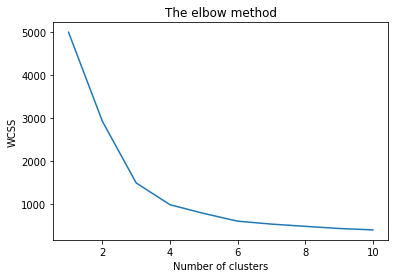

In [26]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(telco_scaled)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()
